In [1]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode activated.


In [2]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Experiment 1

In [3]:
from pycaret.regression import *

In [4]:
s = setup(data, target = 'charges', session_id = 123)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1338, 7)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [5]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4165.9659,3.330203e+07,5770.7909,0.8011,0.4683,0.4153
1,4503.7366,4.374648e+07,6614.1122,0.7456,0.5633,0.4217
2,3880.5528,3.179514e+07,5638.7179,0.5974,0.7645,0.4396
3,3747.6457,2.680530e+07,5177.3833,0.7762,0.5015,0.5175
4,4471.0419,4.341053e+07,6588.6670,0.6771,0.5224,0.3767
5,4182.7551,3.616633e+07,6013.8450,0.7674,0.7416,0.4320
6,4081.1022,3.919259e+07,6260.3984,0.7333,0.6434,0.4241
7,4928.1534,4.641504e+07,6812.8581,0.7448,0.5887,0.4137
8,4609.3147,4.037035e+07,6353.7670,0.7392,0.5686,0.5111
9,4665.8647,4.259679e+07,6526.6220,0.7256,0.8131,0.4802


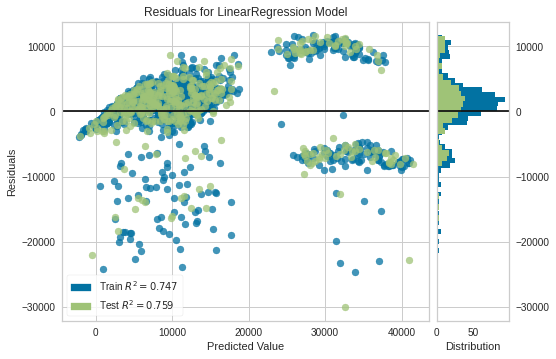

In [6]:
plot_model(lr)

# Experiment 2

In [7]:
s2 = setup(data, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True, feature_interaction=True, 
           bin_numeric_features= ['age', 'bmi'])

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1338, 7)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [8]:
s2[0].columns

Index(['age_Power2', 'bmi_Power2', 'sex_female', 'children_0', 'children_1',
       'children_2', 'children_3', 'children_4', 'children_5', 'smoker_no',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'age_0.0', 'age_1.0', 'age_10.0', 'age_11.0',
       'age_2.0', 'age_3.0', 'age_4.0', 'age_5.0', 'age_6.0', 'age_7.0',
       'age_8.0', 'age_9.0', 'bmi_0.0', 'bmi_1.0', 'bmi_10.0', 'bmi_11.0',
       'bmi_2.0', 'bmi_3.0', 'bmi_4.0', 'bmi_5.0', 'bmi_6.0', 'bmi_7.0',
       'bmi_8.0', 'bmi_9.0', 'sex_female_multiply_bmi_Power2',
       'smoker_no_multiply_age_Power2', 'bmi_Power2_multiply_age_11.0',
       'region_northwest_multiply_bmi_Power2',
       'children_0_multiply_age_Power2', 'children_0_multiply_bmi_Power2',
       'age_Power2_multiply_smoker_no', 'region_northeast_multiply_bmi_Power2',
       'sex_female_multiply_age_Power2', 'bmi_Power2_multiply_age_Power2',
       'region_southeast_multiply_smoker_no', 'bmi_Power2_multiply_sex_fem

In [9]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2930.6529,2.009424e+07,4482.6601,0.8800,0.4023,0.3339
1,3633.7087,3.403491e+07,5833.9444,0.8021,0.4497,0.3487
2,3015.9923,2.389240e+07,4887.9849,0.6975,0.5536,0.3887
3,3284.0445,2.737270e+07,5231.8924,0.7714,0.5659,0.4896
4,3355.1614,2.908500e+07,5393.0513,0.7837,0.4753,0.3202
5,3238.9756,2.413440e+07,4912.6779,0.8448,0.3920,0.3015
6,2896.2396,2.403950e+07,4903.0093,0.8364,0.3805,0.3117
7,3551.6073,3.104395e+07,5571.7095,0.8293,0.4688,0.3153
8,3228.5908,2.380625e+07,4879.1652,0.8462,0.4579,0.3603
9,3301.1438,2.932328e+07,5415.0977,0.8111,0.5233,0.3737


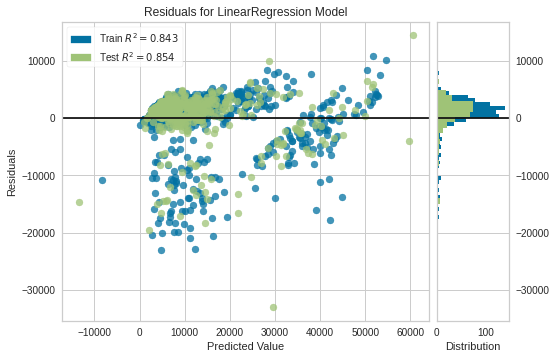

In [10]:
plot_model(lr)

In [11]:
save_model(lr, 'deployment_14052020')

Transformation Pipeline and Model Succesfully Saved


In [12]:
deployment_14052020 = load_model('deployment_14052020')

Transformation Pipeline and Model Sucessfully Loaded


In [13]:
deployment_14052020

[Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 numeric_strategy='mean',
                                 target_variable=None)),
                 ('new_levels1',
                  New_Catagorical_Levels...
                 ('dummy', Dummify(target='charges')),
                 ('fix_perfect', Remove_100(target='charges')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', Empty()), ('fix_multi', Empty()),
                 ('dfs',
                  DFS_Classic(interactions

In [0]:
import requests
url = 'https://insurance-predictor-pycaret.herokuapp.com/predict_api' 
pred = requests.post(url,json={'age':55, 'sex':'male', 'bmi':59, 'children':1, 'smoker':'no', 'region':'northwest'})
print(pred.json())